# Obsah

## Task 1
University of Arizona was sued for sex discrimination. Its admission data showed that men applying to graduate school at Arizona were more likely to be admitted than women.The graduate schools had just accepted 44% of male applicants but only 35% of female applicants. The difference was so great that it was unlikely to be due to chance.
Experts analyzed the data set in detail and find out that discrimination has been carried in a way. Do you agree after analyzing the data set or you have a different conclusion? (Dataset: university.csv)

## Task 2
Analyze the Aircrash dataset and find out the following: (Dataset: Airplane_Crashes_Since_1908.csv)
- a.	Yearly how many planes crashed? How many people were on board? How many survived? How many died?
- b.	Highest number of crashes by operator and Type of aircrafts.
- c.	‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
- d.	Find the number of crashed aircrafts and number of deaths against each category from above step.
- e.	Find any interesting trends/behaviors that you encounter when you analyze the dataset.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

## Task 1
#### a) vizualizing
#### b) statistical tests
#### c) conclusion

### 1a) Vizualizing

In [55]:
df = pd.read_csv('inputs/university.csv')
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


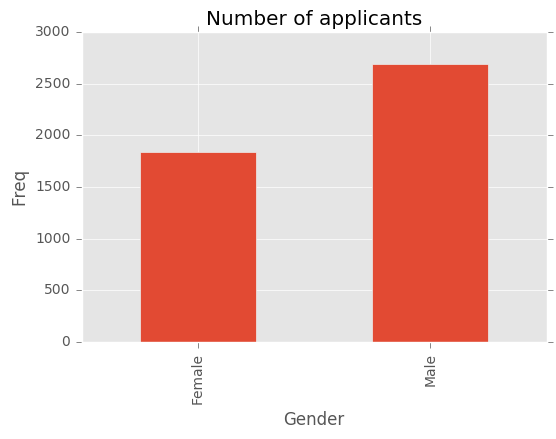

In [56]:
#possible status
pos_status = ['Rejected', 'Admitted']
# plot number of applicants
df_uni = df.groupby('Gender').sum()
df_uni.columns = ['applicants']
df_uni.plot(kind='bar', legend=False)
plt.ylabel('Freq')
plt.title('Number of applicants')

In [77]:
df_uni.ix['Male', 'applicants'] / df_uni.ix['Female', 'applicants']

1.4664850136239782

#### There is 1.5 times more male applicants then female applicants.

In [57]:
# add stats to frame
for stat in pos_status:
    df_uni[stat] = df[df['Admit']==stat].groupby('Gender').sum()

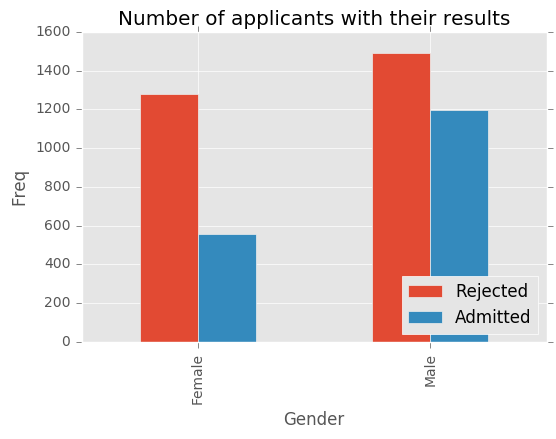

In [58]:
df_uni[pos_status].plot(kind='bar', legend=True)
plt.ylabel('Freq')
plt.title('Number of applicants with their results')
plt.legend(loc=4)
plt.show()

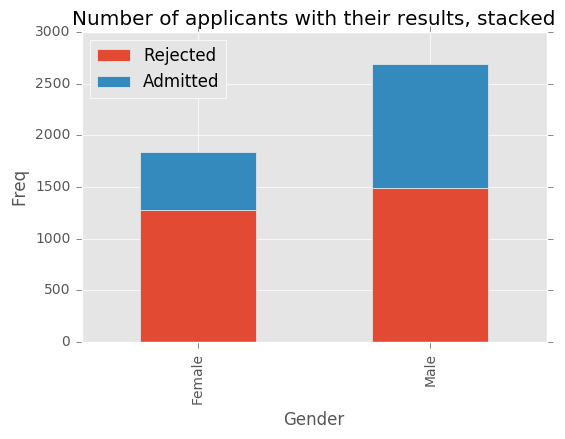

In [59]:
df_uni[pos_status].plot(kind='bar', legend=True, stacked=True)
plt.ylabel('Freq')
plt.title('Number of applicants with their results, stacked')
plt.legend(loc=2)
plt.show()

In [60]:
for stat in pos_status:
    new_stat = stat + '(%)'
    df_uni[new_stat] = df_uni[stat] / df_uni['applicants'] * 100
df_uni

,applicants,Rejected,Admitted,Rejected(%),Admitted(%)
Gender,,,,,
Female,1835,1278,557,69.645777,30.354223
Male,2691,1493,1198,55.481234,44.518766


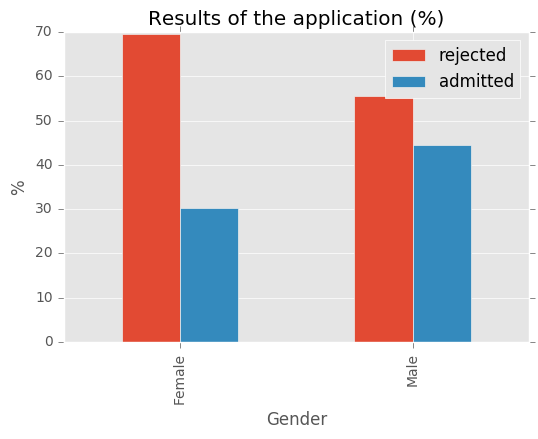

In [61]:
df_uni[['Rejected(%)', 'Admitted(%)']].plot(kind='bar', legend=True)
plt.ylabel('%')
plt.title('Results of the application (%)')
plt.legend(loc=4)
plt.legend(["rejected", "admitted"])
plt.show()

It was posted that the university had accepted 44% of male applicants but only 35% of female applicants. In our dataset we can clearly see that only 30% of females where admitted, which doesnt correspond with original value 35%.  It can be  becouse of the reduction of dataset to only 6 (probably the biggest) departments.

Lets explore admit rates for each department separately.

In [62]:
df['gender_sum_bydept'] = df.groupby(['Gender', 'Dept']).transform(sum)['Freq']
df['perc'] = df['Freq'] / df['gender_sum_bydept']
df.head()

,Admit,Gender,Dept,Freq,gender_sum_bydept,perc
0,Admitted,Male,A,512,825,0.620606
1,Rejected,Male,A,313,825,0.379394
2,Admitted,Female,A,89,108,0.824074
3,Rejected,Female,A,19,108,0.175926
4,Admitted,Male,B,353,560,0.630357


In [63]:
unique_depts = df['Dept'].unique()
df_bydept_admitted = pd.DataFrame(index=unique_depts)
mask_male = (df['Gender'] == 'Male') & (df['Admit'] == 'Admitted')
mask_female = (df['Gender'] == 'Female') & (df['Admit'] == 'Admitted')
df_bydept_admitted['male_admitted'] = df[mask_male].set_index('Dept')['Freq']
df_bydept_admitted['female_admitted'] = df[mask_female].set_index('Dept')['Freq']
df_bydept_admitted['male_sum'] = df[mask_male].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted['female_sum'] = df[mask_female].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted['female_admited(%)'] = df_bydept_admitted['female_admitted'] / df_bydept_admitted['female_sum'] * 100
df_bydept_admitted['male_admited(%)'] = df_bydept_admitted['male_admitted'] / df_bydept_admitted['male_sum'] * 100
df_bydept_admitted.index.name = 'department'
df_bydept_admitted

,male_admitted,female_admitted,male_sum,female_sum,female_admited(%),male_admited(%)
department,,,,,,
A,512,89,825,108,82.4074,62.0606
B,353,17,560,25,68,63.0357
C,120,202,325,593,34.0641,36.9231
D,138,131,417,375,34.9333,33.0935
E,53,94,191,393,23.9186,27.7487
F,22,24,373,341,7.03812,5.89812


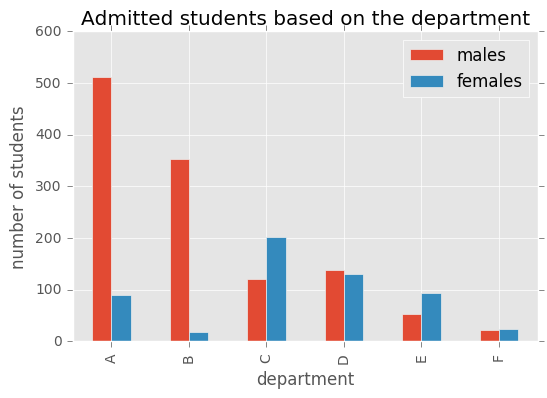

In [64]:
df_bydept_admitted[['male_admitted', 'female_admitted']].plot(kind='bar')
plt.legend(["males", "females"])
plt.title('Admitted students based on the department')
plt.ylabel('number of students')

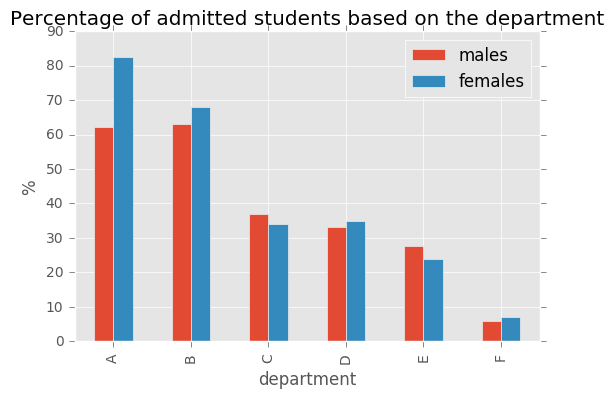

In [65]:
df_bydept_admitted[['male_admited(%)', 'female_admited(%)']].plot(kind='bar')
plt.legend(["males", "females"])
plt.title('Percentage of admitted students based on the department')
plt.ylabel('%')

It is interesting. For 4 departments out of 6 there is bigger percentage of admitted females than males. For other 2 departments it is even close. Based on this  findings it doesnt look like any kind of gender discrimination problem.

### 1b) statistical tests

For this situation we can use binomial test.  We wish to test whether the proportion of admitted females differs significantly from proportion of admitted males (44%). 
##### Null Hypothesis: the proportion of admitted females does not significantly differ from the value of 44% (no gender discrimination)
Lets test it on significance level alfa=0.01

In [79]:
df_uni

,applicants,Rejected,Admitted,Rejected(%),Admitted(%)
Gender,,,,,
Female,1835,1278,557,69.645777,30.354223
Male,2691,1493,1198,55.481234,44.518766


In [91]:
admitted_females = df_uni.ix['Female', 'Admitted']
applicants_females = df_uni.ix['Female', 'applicants']

In [92]:
# testing if 30% admitted rate significantly differs from 44%
scipy.stats.binom_test(admitted_females, applicants_females, p=0.44)

4.7337782208290328e-33

In [94]:
# testing if 35% (originally posted) admitted rate significantly differs from 44%
scipy.stats.binom_test(int(applicants_females*0.35), applicants_females, p=0.44)

4.1394901445214546e-15

In both cases the final p-value is lower than chosen significance level 0.01, therefore we can reject the null Hypothesis. It means there is significant difference between female and male admission. It could indicate gender discrimination.

Do the same testing for each department.